# Recitation 11: Spherical Harmonics

Author: Tri Nguyen

This recitation introduces spherical harmonics.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

%matplotlib notebook

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## Background

### Laplace's equation
Let our coordinate system be $(r, \theta, \phi)$ where $r$ is the radius, $\theta$ is the polar angle, and $\phi$ is the azimuthal angle.
We want to solve the Laplace's equation for a function $\Psi = \Psi(r, \theta, \phi)$:
\begin{equation}
    \nabla^2 \Psi = 0 
\end{equation}
In physics, we often find that we can separate the solution $\Psi$ into a radial component $R(r)$
and an angular component $Y(\theta, \phi)$, i.e. $\Psi(r, \theta, \phi) = R(r) Y(\theta, \phi)$.
Then, the Laplace's equation becomes:
\begin{equation}
    \frac{1}{R}\frac{d}{dr}\left(r^2 \frac{dR}{dr}\right) = l(l+1) , \quad 
    \frac{1}{Y}\frac{1}{\sin\theta} \frac{\partial}{\partial\theta}
    \left(\sin\theta\frac{\partial Y}{\partial \theta}\right) 
    + \frac{1}{Y} \frac{1}{\sin^2\theta} \frac{\partial^2 Y}{\partial \phi^2} 
    = -l(l + 1)
\end{equation}
where we let the separation constant to be $l(l+1)$ by convention.


### Spherical harmonics

In this notebook, we will ignore the radial equation and focus on the angular equation.
To solve for the angular equation, we further apply separation of variables agian by assuming that $Y$ has the form $Y(\theta, \phi) = \Theta(\theta) \Phi(\phi)$:

\begin{equation}
    \label{eq:laplace_azi}
    \frac{1}{\Phi} \frac{d^2\Phi}{d\phi^2} = -m^2
\end{equation}
\begin{equation}
    \label{eq:laplace_polar}
    l(l+1)\sin^2\theta 
    + \frac{\sin\theta}{\Theta}\frac{d}{d\theta}\left(\sin\theta \frac{d\Theta}{d\theta}\right)
    = m^2
\end{equation}

where we let our second separation constant to be $m^2$ by convention.

The azimuthal equation (Eq. \ref{eq:laplace_azi}) has a simple solution:
\begin{equation}
    \label{eq:sol_azi}
    \frac{1}{\Phi} \frac{d^2\Phi}{d\phi^2} = -m^2 \Rightarrow \Phi(\phi) = e^{im\phi}
\end{equation}
Note that we have simplied the solution by letting $m$ be negative. It also happens that $m$ must be an integer (can you guess why?).
The polar equation (Eq. \ref{eq:laplace_polar}) is a bit more complicated, so we will just show the solution here:
\begin{equation}
    \label{eq:sol_polar}
    \Theta(\theta) = P^m_l(\cos\theta)
\end{equation}
where $P^m_n$ is the *associcated Legendre function*, defined as:
\begin{equation}
    P^m_l(x) \equiv (1-x^2)^{m/2} \left(\frac{d}{dx}\right)^m P_l(x)
\end{equation}
where $P_l$ is the $n$-th *Legendre polynomial*.
Using the Rodrigues formula, the Legendre polynomial can be written as:
\begin{equation}
    P_l(x) \equiv \frac{1}{2^l l!}\left(\frac{d}{dx}\right)^l\left(x^2 - 1\right)^l
\end{equation}

Combining the azimuthal and polar solutions (Eq. \ref{eq:sol_azi} and Eq. \ref{eq:sol_polar}),
we have the solution for the angular Laplace's equation:
\begin{equation}
    \boxed{Y^m_l(\theta, \phi) 
    = (-1)^m \sqrt{\frac{(2l + 1)}{4\pi} \frac{(l-m)!}{(l+m)!}} e^{i m \phi} P^m_l(\cos\theta)}
\end{equation}
The functions $Y^m_l (\theta, \phi)$ are known as the **spherical harmonics**.
They are important for many applications in many physics fields, such as quantum mechanics, 
electromagnetism, cosmology, etc. 
The first term of $Y^m_l$ is the normalization constant chosen such that:
\begin{equation}
    \int_0^\pi \int _0^{2\pi} \left|Y^m_l(\theta, \phi)\right|^2 d(\cos\theta) d\phi = 1
\end{equation}

### Some properties of spherical harmonics


The spherical harmoics are orthogonal, in other words:
\begin{equation}
    \int_0^\pi \int _0^{2\pi} 
    \left[Y^m_l(\theta, \phi)\right]^\ast \left[Y^{m'}_{l'} (\theta, \phi)\right] 
    d(\cos\theta) d\phi = \delta_{l l'} \delta_{m m'}
\end{equation}
where $^\ast$ denotes the complex conjugate, and $\delta$ is the Kronecker delta:
\begin{equation}
    \delta_{ij} =
    \begin{cases}
            1, &         \text{if } i=j,\\
            0, &         \text{if } i\neq j.
    \end{cases}
\end{equation}

Note because Scipy uses a different spherical convention than what we previously introduced, 
using  $\phi$ as polar angle and $\theta$ as the azimuthal angle,
we will re-define its spherical harmonic function to match our convention, which is more commonly used in physics.

In [3]:
def Yml(m, l, theta, phi):
    ''' Returns the spherical harmonics Y^m_l(theta, phi) 
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    '''
    return sph_harm(m, l, phi, theta)    

In [39]:
def plot_spherical_harmonics(m, l, mode='real'):
    ''' Plot spherical harmonics Y^m_l (theta, phi)
    where theta is the polar angle (in rad) and phi is the azimuthal angle (in rad).
    
    Args:
    - m, l: (int) spherical harmonics number
    - mode: (str) either "real", "imag", or "abs". Default is "real"
    
    Returns:
    - fig: matplotlib.figure object
    
    '''
    
    
    phi = np.linspace(0, 2*np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    phi, theta = np.meshgrid(phi, theta)
    
    # The Cartesian coordinates of the unit sphere
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
    if mode == 'real':
        fcolors = Yml(m, l, theta, phi).real
    elif mode == 'imag':
        fcolors = Yml(m, l, theta, phi).imag
    elif mode == 'abs':
        fcolors = np.abs(Yml(m, l, theta, phi))
    else:
        raise ValueError('mode must either be "real", "imag", or "abs"')
    fmax, fmin = fcolors.max(), fcolors.min()
    fcolors = (fcolors - fmin)/(fmax - fmin)

    # Set the aspect ratio to 1 so our sphere looks spherical
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
    
    return fig

<IPython.core.display.Javascript object>


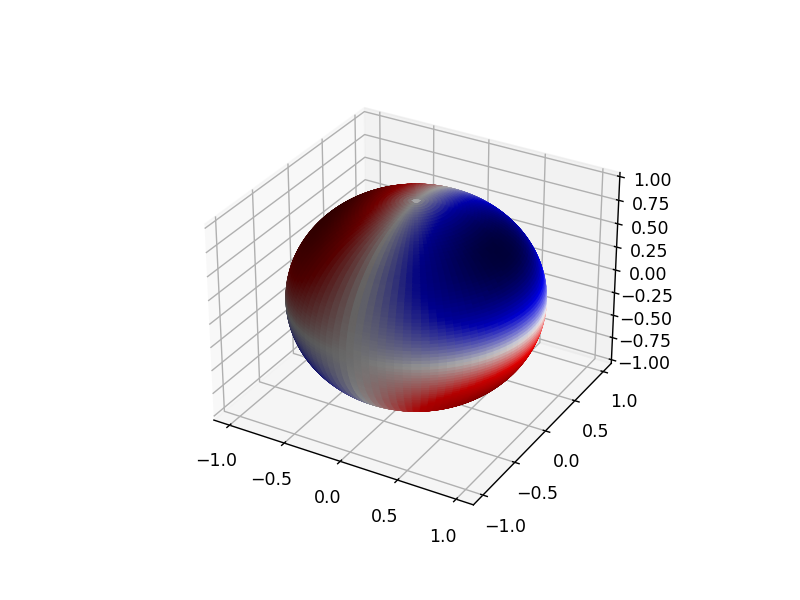

<IPython.core.display.Javascript object>


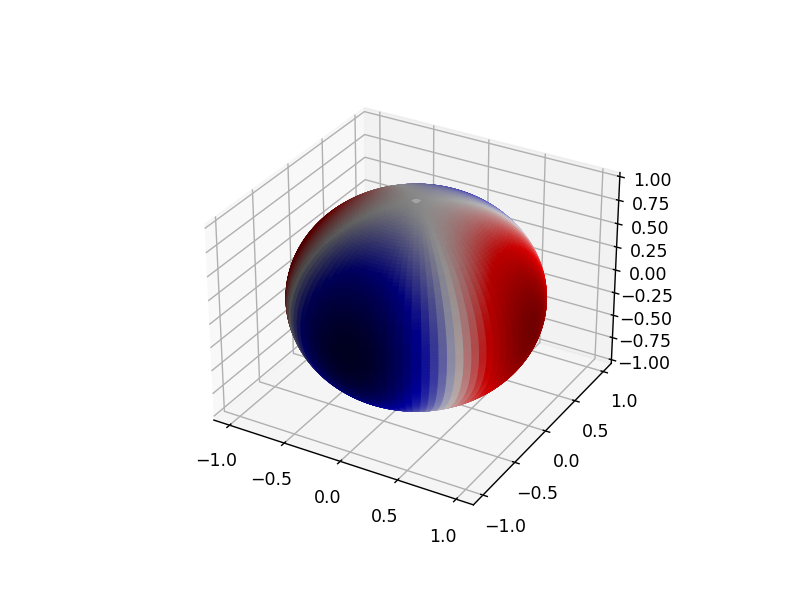

In [38]:
fig1 = plot_spherical_harmonics(1, 2)
fig2 = plot_spherical_harmonics(2, 2)